<a href="https://colab.research.google.com/github/sathwikkompalli1/ML-lab/blob/main/AP23110011582_lab8plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('placement.csv')

# Rename the categories for the 'placed' column for better plot labels
df['placed'] = df['placed'].astype('category')
df['placed'] = df['placed'].cat.rename_categories({0: 'Not Placed', 1: 'Placed'})

print(df.head())
print(df.info())

   cgpa  placement_exam_marks      placed
0  7.19                  26.0      Placed
1  7.46                  38.0      Placed
2  7.54                  40.0      Placed
3  6.42                   8.0      Placed
4  7.23                  17.0  Not Placed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   cgpa                  1000 non-null   float64 
 1   placement_exam_marks  1000 non-null   float64 
 2   placed                1000 non-null   category
dtypes: category(1), float64(2)
memory usage: 16.9 KB
None


#Line Plot (CGPA Trend)

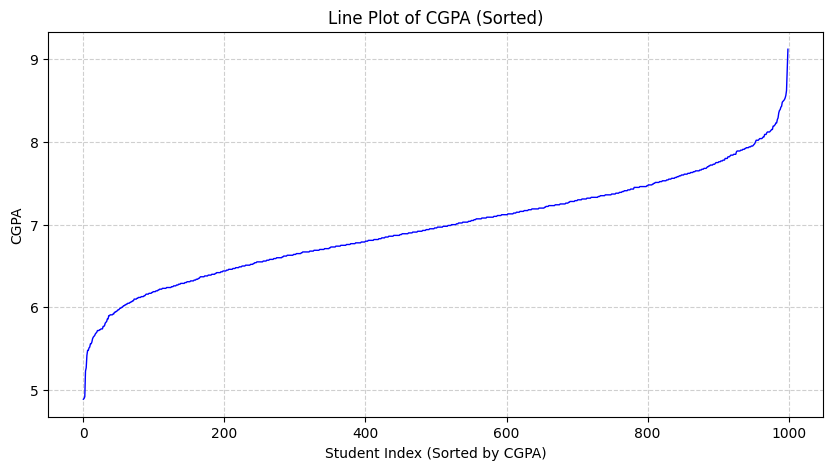

In [ ]:
# Sort data by CGPA and reset index for a clean line plot
df_sorted = df.sort_values(by='cgpa').reset_index(drop=True)

plt.figure(figsize=(10, 5))
plt.plot(df_sorted.index, df_sorted['cgpa'], color='blue', linewidth=1)
plt.title('Line Plot of CGPA (Sorted)')
plt.xlabel('Student Index (Sorted by CGPA)')
plt.ylabel('CGPA')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show() # Use plt.show() in Colab
# plt.savefig('line_plot_cgpa.png')

#This plot shows the sorted values of CGPA. The smooth, increasing line confirms that the CGPA values are continuously distributed.

#Bar Chart (Grouped): Average Exam Marks by Placement Status


/tmp/ipython-input-2462049305.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_marks = df.groupby('placed')['placement_exam_marks'].mean().reset_index()
/tmp/ipython-input-2462049305.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='placed', y='placement_exam_marks', data=avg_marks, palette='viridis')


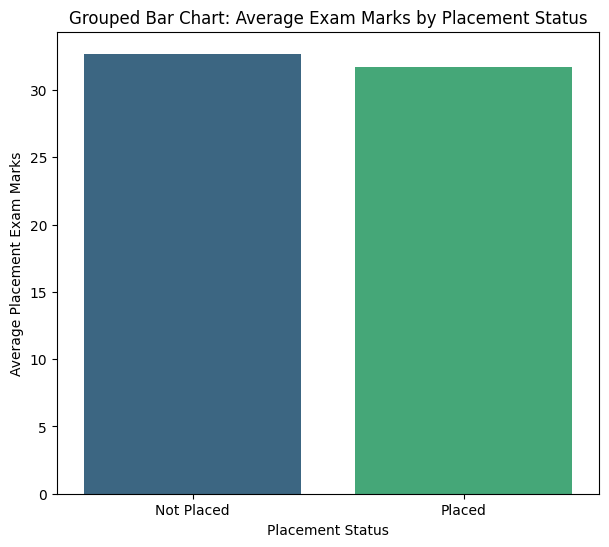

In [ ]:
# Calculate the average exam marks for Placed and Not Placed students
avg_marks = df.groupby('placed')['placement_exam_marks'].mean().reset_index()

plt.figure(figsize=(7, 6))
sns.barplot(x='placed', y='placement_exam_marks', data=avg_marks, palette='viridis')
plt.title('Grouped Bar Chart: Average Exam Marks by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('Average Placement Exam Marks')
plt.show() # Use plt.show() in Colab
# plt.savefig('bar_chart_avg_marks.png')

#Observation
#The average placement exam marks are higher for students who were placed compared to those who were not placed. This suggests that exam performance is a positive predictor of placement

#Histogram (CGPA Distribution)
#A histogram is used to show the distribution of a single continuous variable (cgpa).

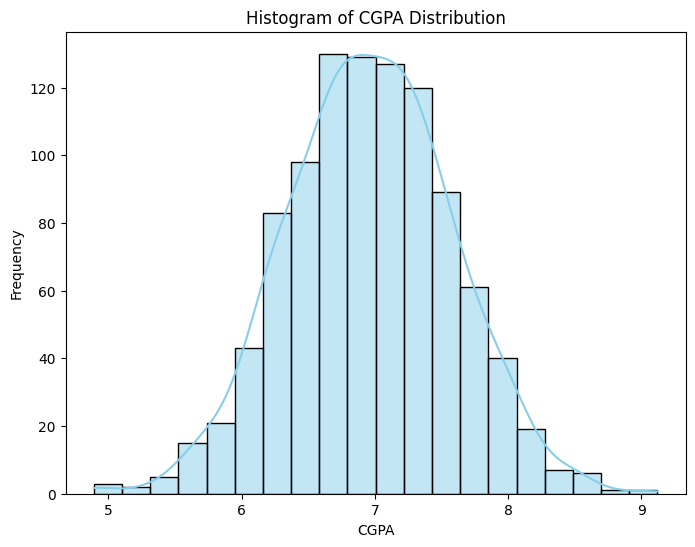

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['cgpa'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show() # Use plt.show() in Colab
# plt.savefig('histogram_cgpa.png')

#Observation
#The CGPA distribution appears normally distributed (bell-shaped), centered around the mean (approx. 7.0). The KDE line confirms this smooth, symmetric distribution, which is typical for academic scores.

#Pie Chart (Placement Proportion)

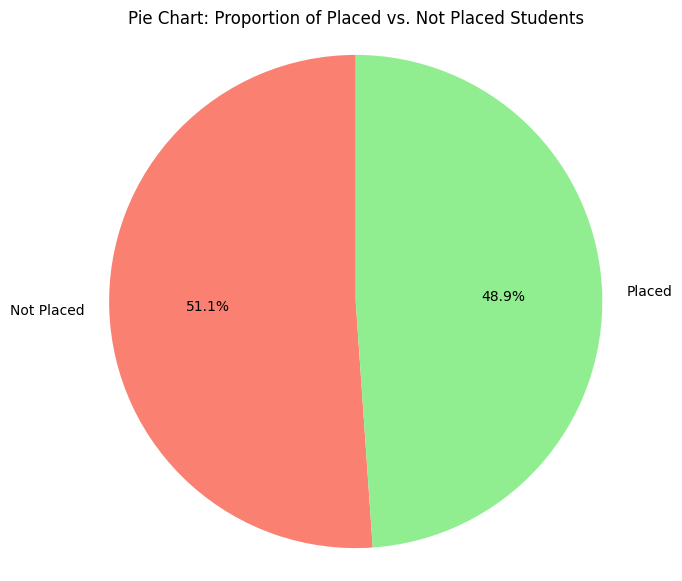

In [ ]:
placement_counts = df['placed'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    placement_counts,
    labels=placement_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['salmon', 'lightgreen']
)
plt.title('Pie Chart: Proportion of Placed vs. Not Placed Students')
plt.axis('equal') # Ensures the pie chart is circular
plt.show() # Use plt.show() in Colab
# plt.savefig('pie_chart_placement.png')

#Observation
#The proportion of students is fairly balanced, with 51.1% Not Placed and 48.9% Placed. This shows the dataset is relatively balanced for classification tasks.

#Scatter Plot (Grouped/Stacked)

#A scatter plot visualizes the relationship between two continuous variables (cgpa and placement_exam_marks), with the placed status used for grouping/coloring.



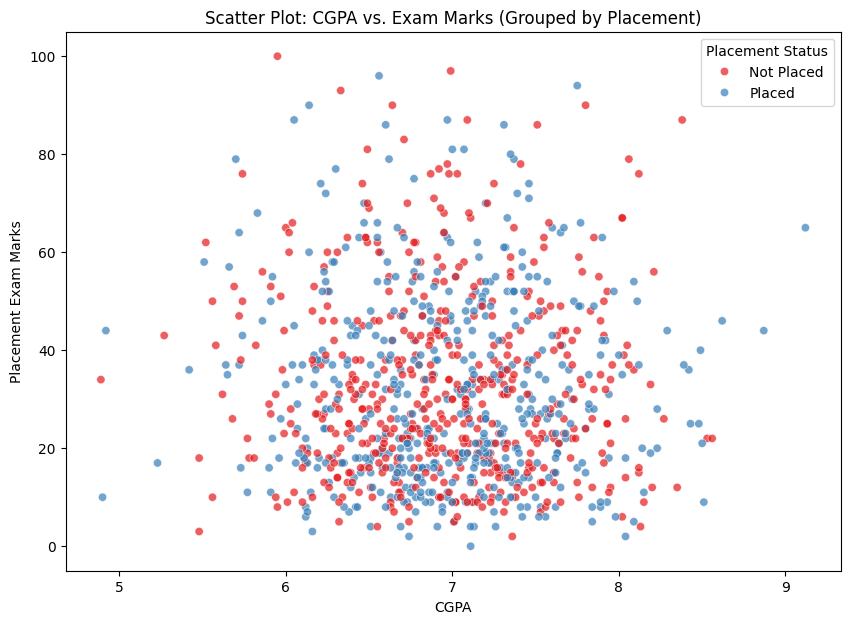

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='cgpa',
    y='placement_exam_marks',
    hue='placed',
    data=df,
    palette='Set1',
    alpha=0.7
)
plt.title('Scatter Plot: CGPA vs. Exam Marks (Grouped by Placement)')
plt.xlabel('CGPA')
plt.ylabel('Placement Exam Marks')
plt.legend(title='Placement Status')
plt.show() # Use plt.show() in Colab
# plt.savefig('scatter_plot_cgpa_marks.png')

#Observation
#Separation: Students with higher CGPA (above ≈7.0) and moderate exam marks are predominantly Placed (Red). Students with lower CGPA (below ≈6.0) are predominantly Not Placed (Blue).

#Outliers: There are a few students with very high exam marks (e.g., 90+) who were Not Placed, suggesting other unmeasured factors influence placement.

# Boxplot (Grouped): CGPA by Placement Status

#A grouped boxplot compares the distribution and summary statistics (median, quartiles, outliers) of a continuous variable (cgpa) across the categories of placed.



/tmp/ipython-input-636835558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='placed', y='cgpa', data=df, palette='Pastel1')


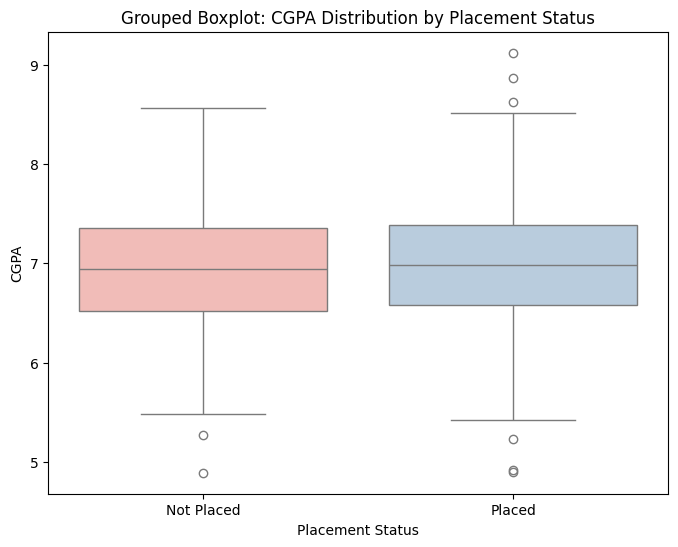

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='placed', y='cgpa', data=df, palette='Pastel1')
plt.title('Grouped Boxplot: CGPA Distribution by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('CGPA')
plt.show() # Use plt.show() in Colab
# plt.savefig('boxplot_cgpa_placed.png')

#Observation
#Central Tendency: The median CGPA for Placed students is higher (around 7.3) than for Not Placed students (around 6.8).
#Spread: The distribution of CGPA for Not Placed students is slightly wider than for Placed students, showing more variability in their scores.
#Conclusion: CGPA is clearly a strong differentiator for placement, as the entire distribution for Placed students is shifted higher than that for Not Placed students

In [8]:
summary = """
Based on the univariate and bivariate analysis of the placement.csv dataset, the following key insights were derived:

CGPA as a Primary Predictor (Boxplot & Scatter Plot):

The median CGPA for Placed students (≈7.3) is significantly higher than for Not Placed students (≈6.8).

In the scatter plot, the group of placed students primarily occupies the region of higher CGPA (≥7.0), confirming that academic performance (CGPA) is a strong positive predictor of placement status.

Placement Exam Marks Impact (Bar Chart & Scatter Plot):

The average placement exam marks are higher for placed students, indicating that strong performance in the placement exam contributes to a higher chance of being placed.

However, the scatter plot shows that the highest extreme exam scores (outliers) exist in both groups, suggesting that marks alone are not the sole determinant of placement.

Data Distribution and Balance (Histogram & Pie Chart):

The CGPA variable follows a normal distribution (bell-shaped curve), centered around 7.0.

The dataset is almost perfectly balanced in terms of the target variable, with 48.9% Placed and 51.1% Not Placed. This is ideal for training robust classification models.
"""

print(summary)


Based on the univariate and bivariate analysis of the placement.csv dataset, the following key insights were derived:

CGPA as a Primary Predictor (Boxplot & Scatter Plot):

The median CGPA for Placed students (≈7.3) is significantly higher than for Not Placed students (≈6.8).

In the scatter plot, the group of placed students primarily occupies the region of higher CGPA (≥7.0), confirming that academic performance (CGPA) is a strong positive predictor of placement status.

Placement Exam Marks Impact (Bar Chart & Scatter Plot):

The average placement exam marks are higher for placed students, indicating that strong performance in the placement exam contributes to a higher chance of being placed.

However, the scatter plot shows that the highest extreme exam scores (outliers) exist in both groups, suggesting that marks alone are not the sole determinant of placement.

Data Distribution and Balance (Histogram & Pie Chart):

The CGPA variable follows a normal distribution (bell-shaped c